In [2]:
# !pip install scipy

In [3]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Домашнее задание»</b></h3>


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [4]:
sigma = 225**0.5  # Стандартное отклонение
Z = 1.96          # Квантиль нормального распределения при 𝛽 = 0.95. 
Delta = 3         # Погрешность

N = int(((sigma*Z)/Delta)**2) #Запишите в эту переменную ваш высчитанный ответ!

In [5]:
N

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [6]:
n = 25 # Объём выборки
m = 130 # среднее значение по выборке
sigma = 15 # СКО
confidence = 0.98

h = sigma * stats.t.ppf((1 + confidence)/2, n-1)
ci_lower, ci_upper = m - h, m + h
L = round(ci_upper - ci_lower)  #Запишите в эту переменную ваш высчитанный ответ!

In [7]:
L

75

Рассчитем длину доверительного интервала для нормального распределения(без использования распределения Стьюдента).

$$ (\overline{x} - \frac{\sigma}{\sqrt{n}}Z_a; \overline{x} + \frac{\sigma}{\sqrt{n}}Z_a)$$

In [23]:
z = 2.326 # квантиль нормального распределения при уровне значимости 0.98
ci_l, ci_u = m - (sigma/np.sqrt(n))*z, m + (sigma*z/np.sqrt(n))*z
round(ci_upper - ci_lower)

75

Результаты одинаковы. Вероятно, это связанно с большим объёмом выборки.

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

Гипотеза

* H0: Различие между выборками случайно
* H1: Различие между выборками неслучайно

In [8]:
import scipy.stats as stats
np.random.seed(0) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

k=0

for i in range(1000):
    mens  = stats.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
    womens = stats.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
    t, p = stats.ttest_ind(mens,womens)
    if p < 0.001:
        k+=1

k

295

In [9]:
mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

t, p = stats.ttest_ind(mens,womens)
print(t, p)

27.012163855813704 1.6583731683259572e-160


(array([4.4000e+01, 2.5300e+02, 1.2610e+03, 4.6700e+03, 1.2048e+04,
        2.2856e+04, 3.1940e+04, 3.2425e+04, 2.3921e+04, 1.3298e+04,
        5.3320e+03, 1.5310e+03, 3.4600e+02, 6.9000e+01, 6.0000e+00]),
 array([130.01985562, 135.68332118, 141.34678674, 147.0102523 ,
        152.67371786, 158.33718342, 164.00064898, 169.66411454,
        175.3275801 , 180.99104566, 186.65451122, 192.31797678,
        197.98144234, 203.6449079 , 209.30837346, 214.97183902]),
 <BarContainer object of 15 artists>)

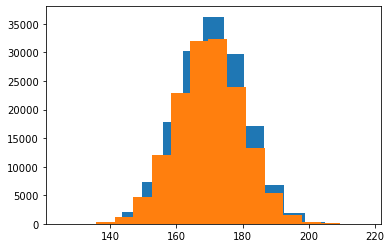

In [10]:
plt.hist(mens, bins=15)
plt.hist(womens, bins=15)

Условие задачи составлено не корректно. Тест Стьюдента показывает случайность полученных различий, о их величине можно судить только косвенно. В данном случае значение статистики составляет p = 27.01, можно сделать вывод о небольших различиях между выборками, что подверждается графиком.
Т.к. p = 2.199757638105596e-185 отклоняем нулевую гипотезу. Различие между выборками, вероятно, не случайно при уровне значимости 𝛼  = 0.001.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [11]:
sigma = 150  # Стандартное отклонение
Z = 1.96          # Квантиль нормального распределения при 𝛽 = 0.95. 
Delta = 50        # Погрешность

n_coffe = int(((sigma*Z)/Delta)**2)
n_coffe

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [12]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


* H0: Предсказания волшебника случайны
* H1: Волшебник действительно предсказывает погоду

In [13]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)

print('Статистика=%.3f, p=%.3f' % (oddsratio, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, предсказания, вероятно, случайны')
else:
    print('Отклоняем нулевую гипотезу, вероятно, волшебник действительно предсказывает погоду')

Статистика=0.581, p=0.354
Не отклоняем нулевую гипотезу, предсказания, вероятно, случайны


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [14]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n-1)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [15]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.07363110319857, 6.628571428571429, 7.183511753944288)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [16]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

print('Тест Стьюдента для двух выборок')
stat, p = stats.ttest_ind(A, B)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')
 
print('Тест Манна-Уитни')
stat, p = stats.mannwhitneyu(A, B)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Тест Стьюдента для двух выборок
Статистика=11.86523, p=0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются
Тест Манна-Уитни
Статистика=9280.50000, p=0.00000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Ttest_indResult(statistic=11.865233896372924, pvalue=4.623319592204015e-25)

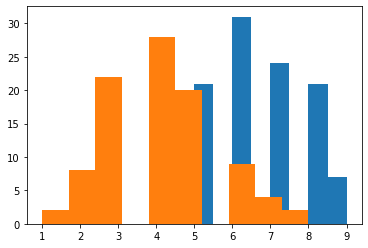

In [17]:
plt.hist(A);
plt.hist(B);
stats.ttest_ind(A,B)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [18]:
### Ваши выводы: В зависимости от того, каким уровнем значимости мы задались, мы можем как отклонить нулевую гипотезу
### и считать, что скорее всего распределение ненормальное, так и не отклонить нулевую гипотезу, что распределение нормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [19]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test
stat, p = stats.ttest_ind(A, B)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различия, вероятно, являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики')
else:
    print('Отклоняем нулевую гипотезу, вероятно, имеется значимое различие эффективности препаратов')

Статистика=-1.95301, p=0.05128
Не отклоняем нулевую гипотезу, различия, вероятно, являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики


Различия были бы значимы при p-value < 0.05.

(array([ 1.,  0.,  3.,  7., 10., 23., 25., 39., 52., 41., 41., 25., 19.,
         7.,  7.]),
 array([122.95604119, 128.44510897, 133.93417676, 139.42324455,
        144.91231234, 150.40138013, 155.89044792, 161.3795157 ,
        166.86858349, 172.35765128, 177.84671907, 183.33578686,
        188.82485464, 194.31392243, 199.80299022, 205.29205801]),
 <BarContainer object of 15 artists>)

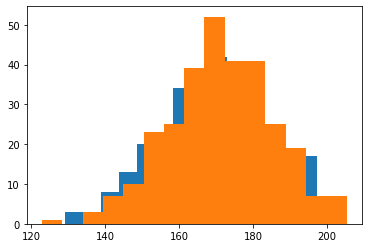

In [20]:
plt.hist(A, bins=15)
plt.hist(B, bins=15)